# Build a simple digit recognizer

### load the data

In [70]:
from tensorflow.keras.datasets import mnist

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

In [4]:
Xtrain.shape[0] # the size of the train dataset

60000

In [71]:
Xtest.shape # the size of the test dataset

(10000, 28, 28)

In [6]:
np.unique(ytrain) # the targets are 10 unique numbers

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

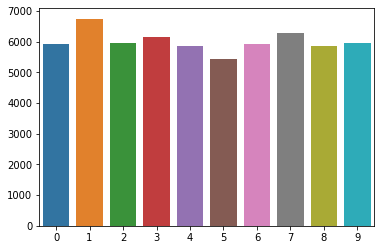

In [7]:
sns.barplot(x= np.unique(ytrain), y=np.bincount(ytrain)); # the classes are relatively balanced

### visualize the data

In [8]:
import matplotlib.pyplot as plt

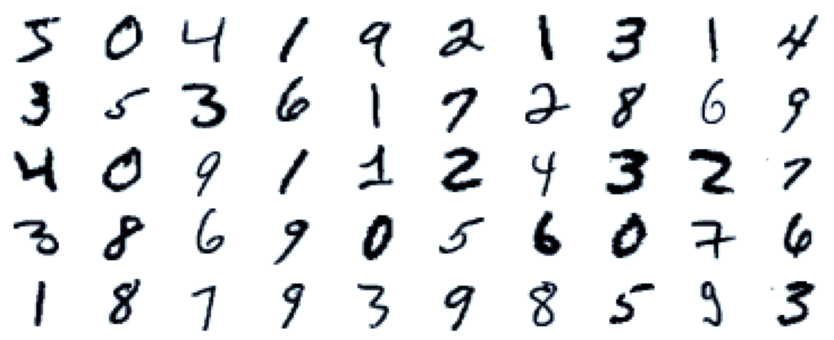

In [9]:
fig, axes = plt.subplots(5, 10, figsize=(15,6), subplot_kw = dict(xticks=[], yticks=[]), gridspec_kw=dict(hspace=0.05, wspace=0.05))
for i, ax in enumerate(axes.flat):
    ax.imshow(Xtrain[i], cmap='bone_r')
    for j in ax.spines.values():
        j.set_visible(False)

### build a neural network model

In [10]:
from tensorflow.keras import models, layers
import tensorflow

In [11]:
np.shape(Xtrain[0])

(28, 28)

In [12]:
Xtrain.shape

(60000, 28, 28)

In [15]:
from keras.utils import to_categorical

In [16]:
ytrain= to_categorical(ytrain) # one_hot transform

In [52]:
model = models.Sequential()
model.add(layers.Conv2D(5, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(10, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [53]:
model.fit(tensorflow.expand_dims(Xtrain,axis=-1), ytrain, epochs=5, steps_per_epoch=256)

Epoch 1/5
256/256 [==============================] - 5s 18ms/step - loss: 6.6982 - acc: 0.6646
Epoch 2/5
256/256 [==============================] - 5s 18ms/step - loss: 0.6204 - acc: 0.9040
Epoch 3/5
256/256 [==============================] - 5s 18ms/step - loss: 0.3564 - acc: 0.9305
Epoch 4/5
256/256 [==============================] - 5s 19ms/step - loss: 0.2527 - acc: 0.9425
Epoch 5/5
256/256 [==============================] - 5s 19ms/step - loss: 0.1998 - acc: 0.9497


In [54]:
model.history.history.keys()

dict_keys(['loss', 'acc'])

In [55]:
epochs = range(1, 6) 
loss = model.history.history['loss']
acc = model.history.history['acc']

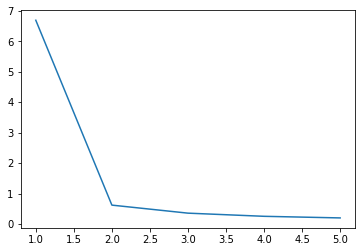

In [56]:
plt.plot(epochs, loss, label='loss')

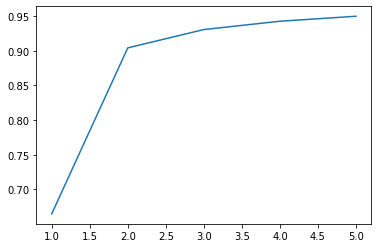

In [57]:
plt.plot(epochs, acc, label='acc')

In [58]:
pred=model.predict(Xtest.reshape(10000, 28,28,1))

313/313 [==============================] - 1s 2ms/step


In [59]:
def get_predicted_value(y_p):
    y_result=[]
    for x in y_p:
        y_result.append(np.where(x==max(x))[0][0])
    return y_result

In [60]:
pred[0]

array([2.6198124e-10, 2.1894995e-13, 2.9293563e-08, 8.4295699e-08,
       5.2139825e-15, 1.8113873e-11, 1.3891545e-18, 9.9999964e-01,
       1.9049082e-07, 1.1284217e-09], dtype=float32)

In [61]:
print(np.where(pred[0]==max(pred[0]))[0][0]) # this will give the corresponding column that has the largest value, which is the predicted value

7


In [62]:
def visualize_result(label):
    fig, axes = plt.subplots(5, 10, figsize=(15,6), subplot_kw = dict(xticks=[], yticks=[]), gridspec_kw=dict(hspace=0.05, wspace=0.05))
    for i, ax in enumerate(axes.flat):
        ax.imshow(Xtest[labels==label][i].reshape(28, 28), cmap='bone_r')
        for j in ax.spines.values():
            j.set_visible(False)

In [63]:
labels = get_predicted_value(pred)

In [64]:
labels = np.array(labels)

In [65]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

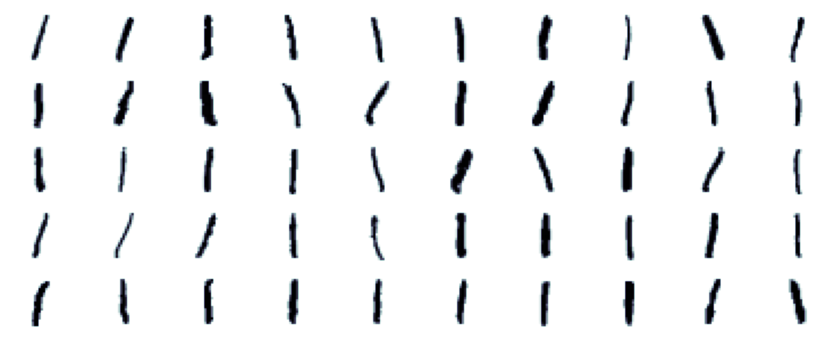

In [66]:
visualize_result(1) # the predictoin result looks pretty good 

### evaluate the neural model

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

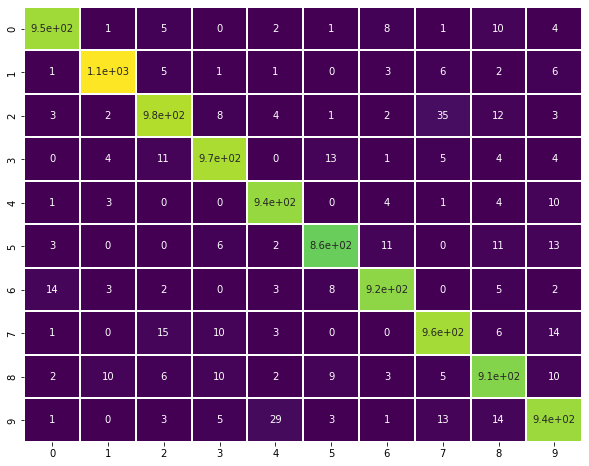

In [68]:
sns.heatmap(confusion_matrix(labels, ytest), annot=True, cbar=False, cmap='viridis', linewidth=0.01)
fig = plt.gcf()
fig.set_size_inches(10, 8)

In [69]:
print(classification_report(labels, ytest))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       986
           1       0.98      0.98      0.98      1137
           2       0.95      0.93      0.94      1055
           3       0.96      0.96      0.96      1012
           4       0.95      0.98      0.96       959
           5       0.96      0.95      0.95       903
           6       0.97      0.96      0.96       962
           7       0.94      0.95      0.94      1011
           8       0.93      0.94      0.94       963
           9       0.93      0.93      0.93      1012

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.96      0.95      0.96     10000



### build a Knn model

In [217]:
from sklearn.neighbors import KNeighborsClassifier

In [218]:
clf = KNeighborsClassifier(n_neighbors=10)

In [219]:
train_data = Xtrain.reshape(60000, 28*28)
test_data = Xtest.reshape(10000, 28*28)

In [220]:
labels = clf.fit(train_data, ytrain).predict(test_data)

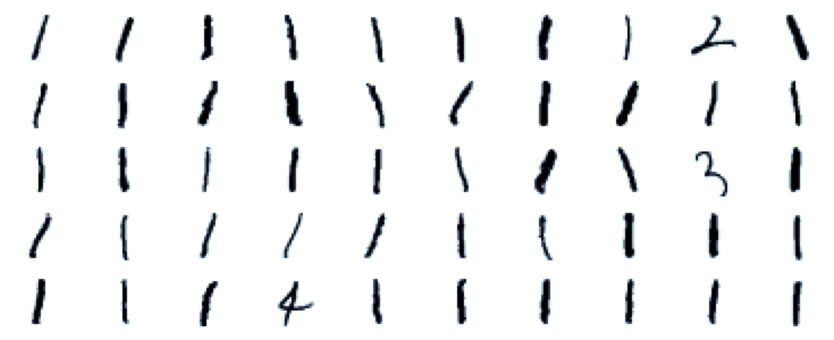

In [221]:
visualize_result(1) # the prediction is mostly correct for 1

### evaluate the knn model

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [154]:
clf.score(test_data, ytest) # perfect

0.9665

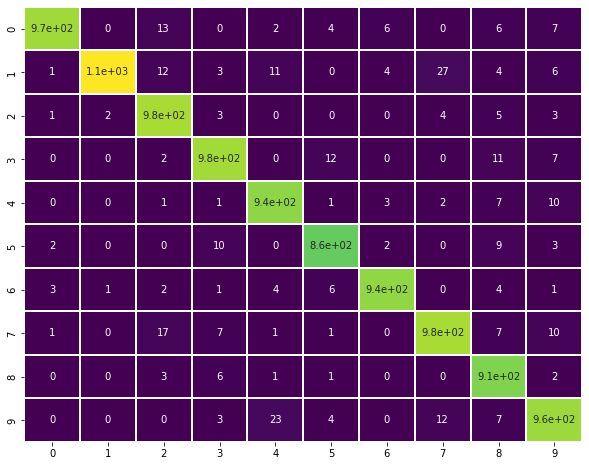

In [167]:
sns.heatmap(confusion_matrix(labels, ytest), cbar=False, cmap='viridis', annot=True, linewidth=0.01)
fig = plt.gcf()
fig.set_size_inches(10, 8)

In [165]:
print(classification_report(labels, ytest)) # the model works perfectly

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1010
           1       1.00      0.94      0.97      1200
           2       0.95      0.98      0.97      1000
           3       0.97      0.97      0.97      1008
           4       0.96      0.97      0.97       965
           5       0.97      0.97      0.97       889
           6       0.98      0.98      0.98       965
           7       0.96      0.96      0.96      1027
           8       0.94      0.99      0.96       927
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### build a svm classifier

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [13]:
svc = SVC(kernel = 'rbf')

In [16]:
labels = svc.fit(train_data, ytrain).predict(test_data)

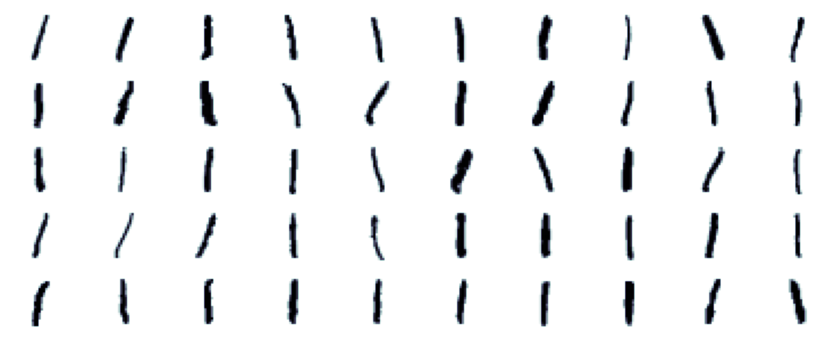

In [23]:
visualize_result(1) # it seems that svc provide better prediction

### evaluate svc model

In [47]:
svc.score(test_data, ytest)

0.9792

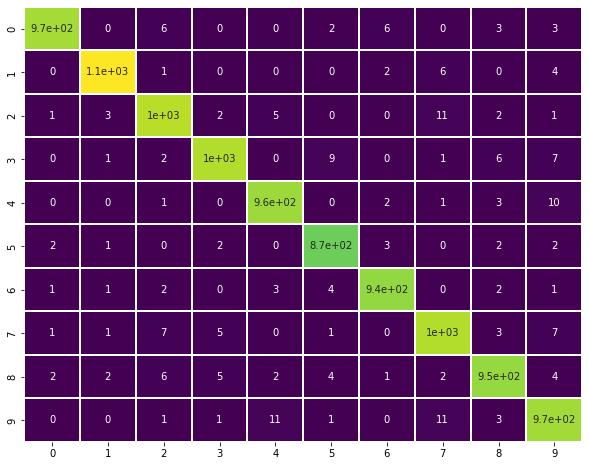

In [50]:
sns.heatmap(confusion_matrix(labels, ytest), annot=True, linewidth=0.01, cbar=False, cmap='viridis')
fig = plt.gcf()
fig.set_size_inches(10,8)

In [51]:
print(classification_report(labels, ytest)) # SCV performs even better

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       993
           1       0.99      0.99      0.99      1139
           2       0.97      0.98      0.98      1031
           3       0.99      0.97      0.98      1021
           4       0.98      0.98      0.98       978
           5       0.98      0.99      0.98       883
           6       0.99      0.99      0.99       958
           7       0.97      0.98      0.97      1021
           8       0.98      0.97      0.97       978
           9       0.96      0.97      0.97       998

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

